In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')
print (penguins.shape)
penguins.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins['bill_length_mm'].fillna(value = penguins['bill_length_mm'].mean(), inplace=True)
penguins ['bill_depth_mm'].fillna(value = penguins['bill_depth_mm'].mean(), inplace=True)
penguins ['flipper_length_mm'].fillna(value = penguins['flipper_length_mm'].mean(), inplace=True)
penguins ['body_mass_g'].fillna(value = penguins['body_mass_g'].mean(), inplace=True)
penguins ['sex'] = penguins['sex'].apply(lambda x: 1 if x == 'MALE' else 0)
penguins ['Biscoe'] = penguins['island' ].apply(lambda x: 1 if x == 'Biscoe' else 0)
penguins ['Dream'] = penguins['island'].apply(lambda x: 1 if x == 'Dream' else 0)

In [6]:
colnames = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex',
'Biscoe', 'Dream']
X = penguins [colnames]
y = penguins.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [8]:
pen_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,random_state =1).fit(X_train, y_train)

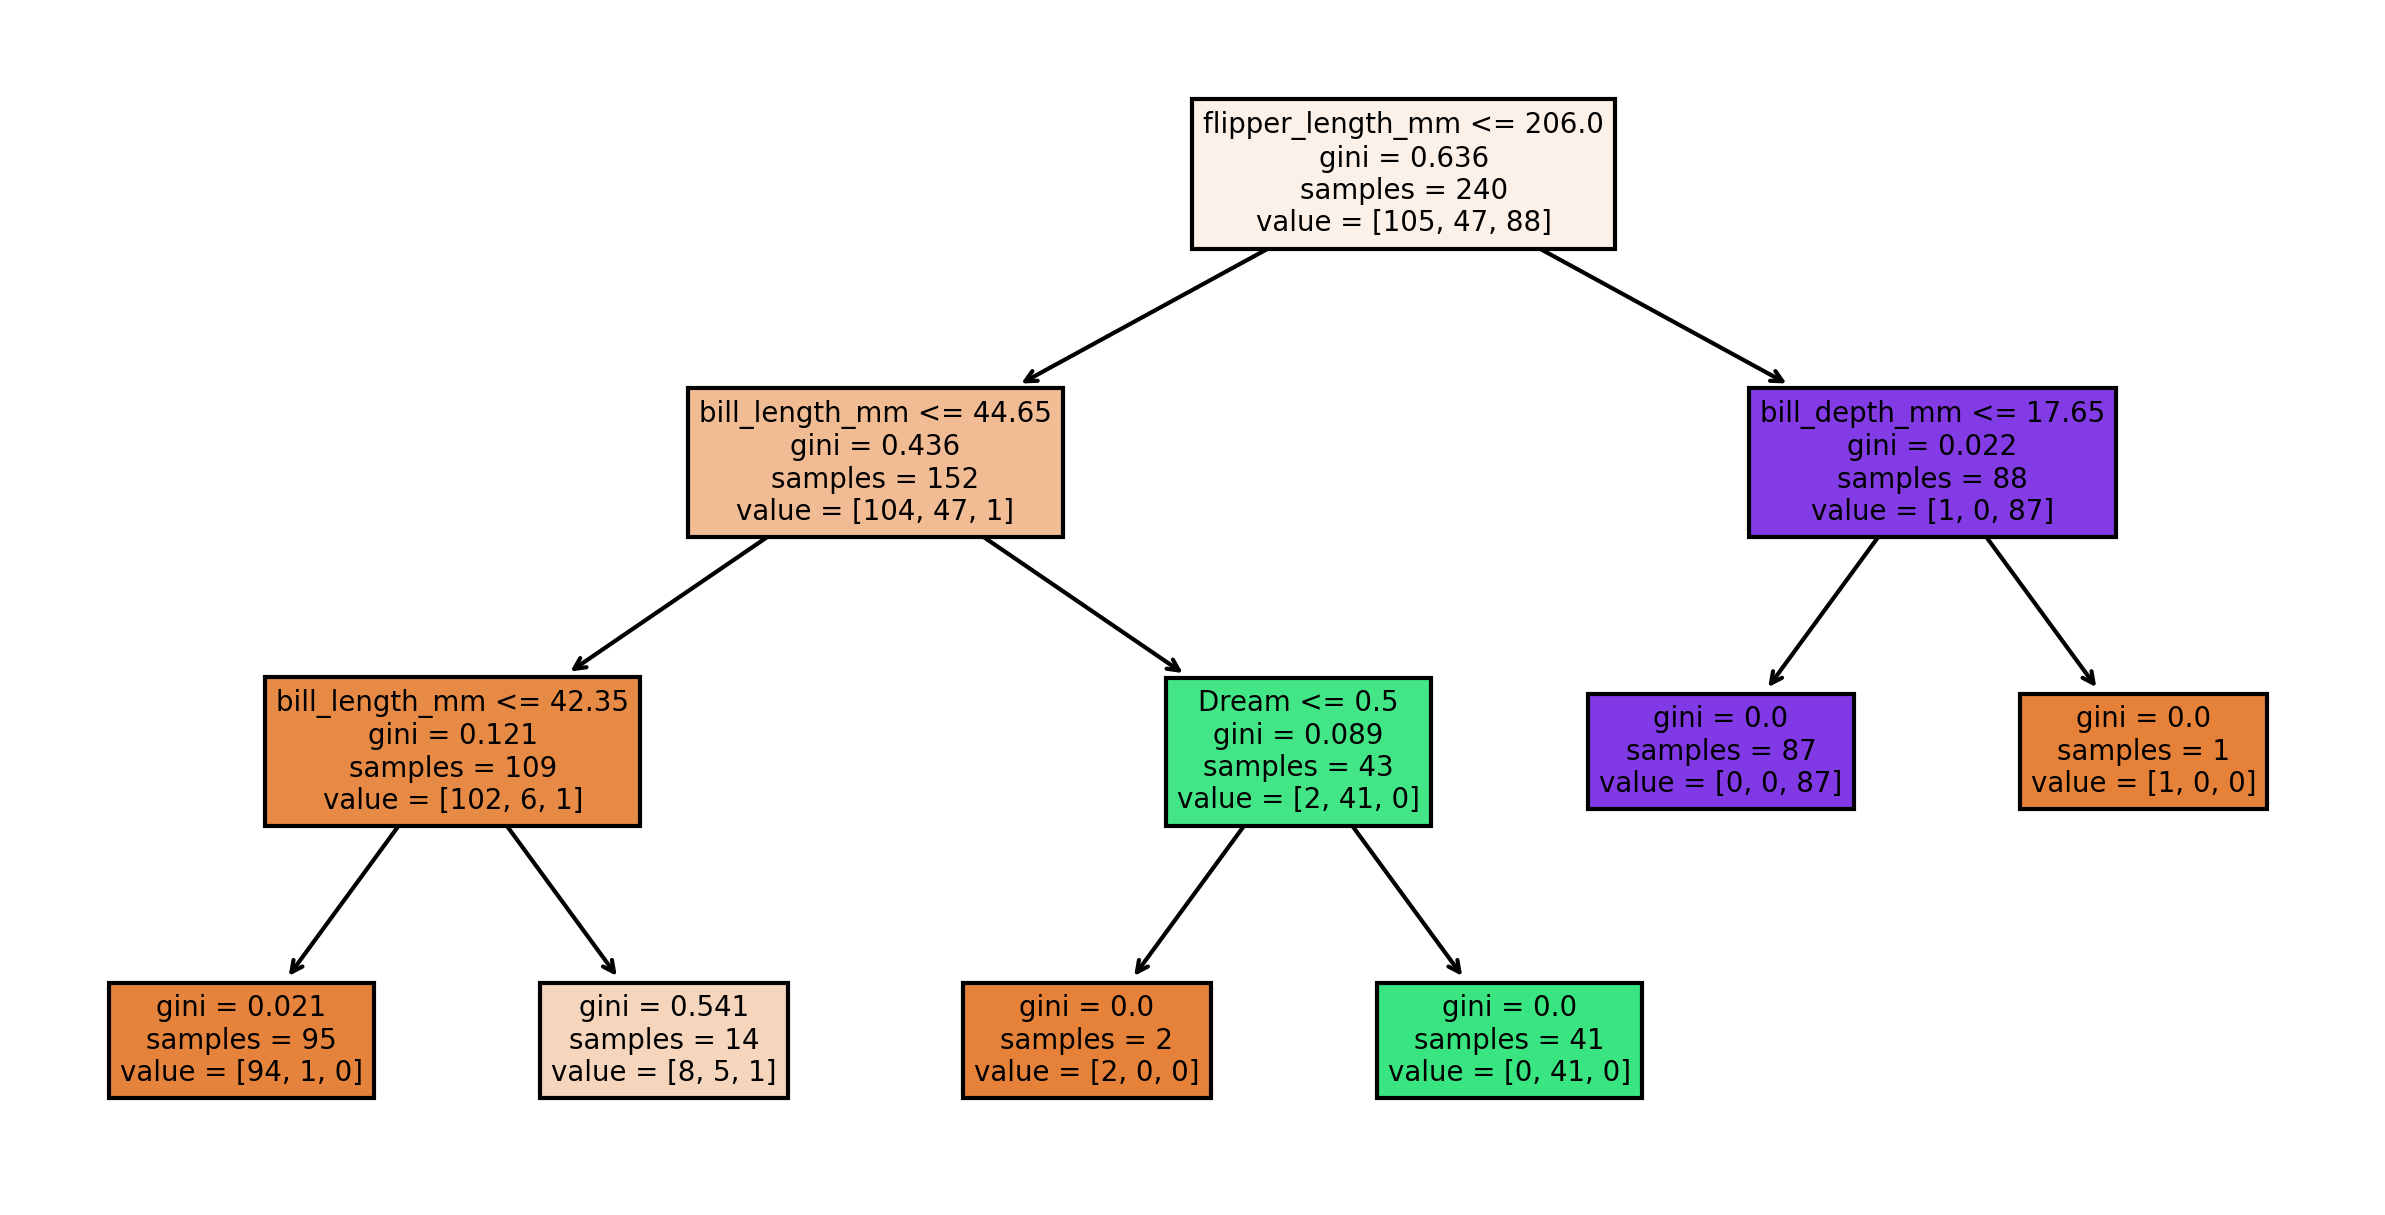

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5), dpi = 300)
plotResult = sklearn.tree.plot_tree(pen_tree,
                                    feature_names = colnames,
                                    filled = True)

In [13]:
print(pen_tree.score(X_test,y_test))
pred_y = pen_tree.predict(X_test)
print(confusion_matrix(y_test, pred_y))

0.9423076923076923
[[47  0  0]
 [ 5 16  0]
 [ 1  0 35]]
